In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

path = "coalbumps.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)
#data = data.drop(['Formation','Well Name'], axis = 1)
data.head()
data.shape

(2584, 19)

In [2]:
train_sizes = list(range(100,3800,100))



In [3]:
categorical = ["SeismicHazard", "SeismoacousticHazard", "SeismicHazardAssessment", "ShiftType"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass


In [4]:
def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

In [5]:
from sklearn.model_selection import learning_curve
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler

target = 'CurrentShiftHazard'
features = [feature for feature in list(data.head(0)) if feature != target]

ros = RandomOverSampler()
X, y = ros.fit_sample(data[features], data[target])

y.shape


(4828,)

In [6]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = tree.DecisionTreeClassifier(max_depth=10), X=X,
                                                             y=y, train_sizes=train_sizes, cv=5, scoring='f1', shuffle=True)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)


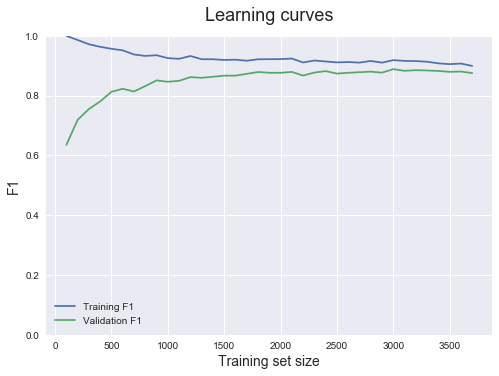

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')


def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training F1')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation F1')
    plt.ylabel('F1', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean)

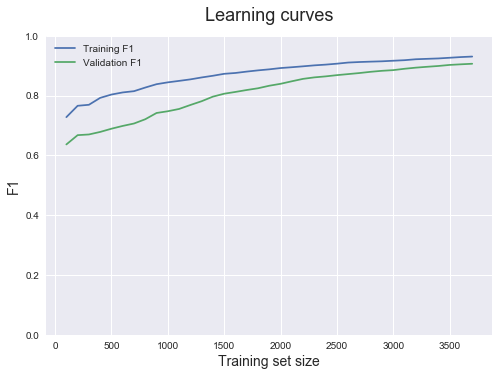

In [8]:
import sklearn

knn_est = sklearn.neighbors.KNeighborsClassifier()


plot_learning_curve(*tv_scores_mean(knn_est,X,y,train_sizes))

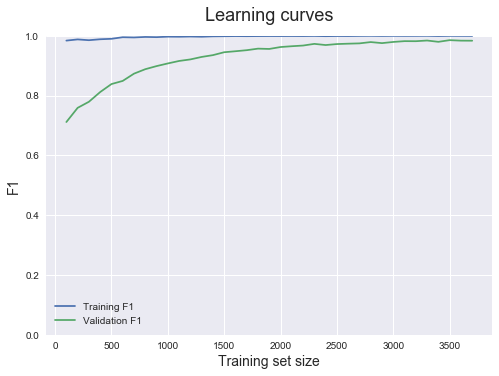

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc_est = RandomForestClassifier()

plot_learning_curve(*tv_scores_mean(rfc_est,X,y,train_sizes))

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


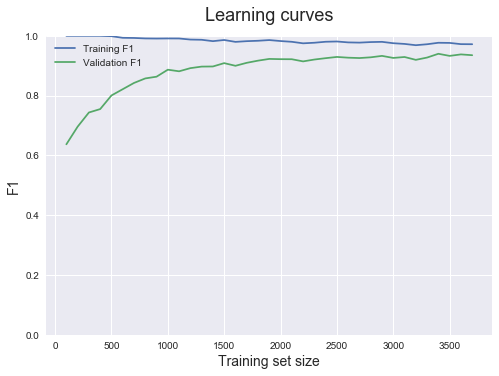

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


X_scale=X

scaler = StandardScaler()
scaler.fit(X_scale)

X_scale = scaler.transform(X_scale)


mlp_est = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,30), random_state=1)


plot_learning_curve(*tv_scores_mean(mlp_est,X_scale,y,train_sizes))

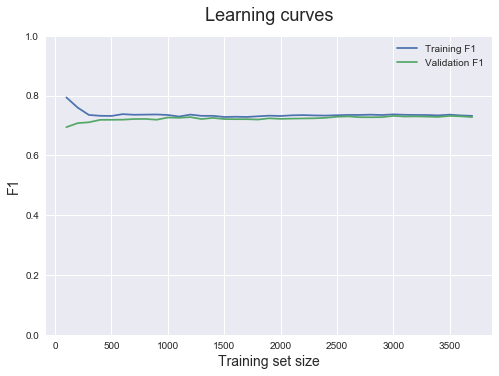

In [11]:
from sklearn import svm

svm_est = svm.SVC(kernel='linear', C=1, gamma=1)

plot_learning_curve(*tv_scores_mean(svm_est,X_scale,y,train_sizes))